### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X és y adatok generálása

In [2]:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3.3, 4.2, 5.4, 6.1, 7.3, 8.2])

In [3]:
X = pd.Series(X)
y = pd.Series(y)

Xy = {'X': X, 'y': y}

df = pd.DataFrame(Xy)
df

,X,y
0,1,3.3
1,2,4.2
2,3,5.4
3,4,6.1
4,5,7.3
5,6,8.2


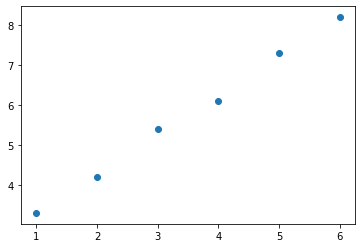

In [4]:
plt.scatter(df.X, df.y)

### B0 és B1 kezdőértékének inicializálása

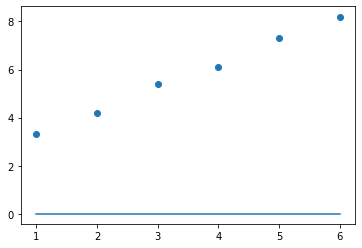

In [5]:
B0 = 0
B1 = 0

y_ = np.array(B0 + df.X*B1)

plt.scatter(df.X, df.y)
plt.plot(df.X, y_)

### Gradient descent függvény írása lépsről lépésre követéshez

In [7]:
def y_kalap(b0, b1, x):
    return np.array(b0 + np.array(x)*b1)

def gradient_descent(b0, b1, x, y):    
    db0 = np.sum(y_kalap(b0, b1, x) - np.array(y))
    print('B0 derivált: ', db0)

    db1 = np.sum((y_kalap(b0, b1, x) - np.array(y))*np.array(x))
    print('B1 derivált: ', db1)
    
    b0 = b0 - db0*0.01
    print('B0: ', b0)

    b1 = b1 - db1*0.01
    print('B1: ', b1)
    
    y_ = y_kalap(b0, b1, x)
    print('y_ hibái: ', np.array(y_) - np.array(y))
    hiba = np.sum((np.array(y_) - np.array(y))**2)
    print('Összes hiba: ', hiba)
    
    plt.plot(x, y_)
    plt.scatter(x, y)
    
    return b0, b1

### Gradient descent függvény írása ciklushoz

In [8]:
def gradient_descent_ciklushoz(b0, b1, x, y):    
    db0 = np.sum(y_kalap(b0, b1, x) - np.array(y))
    db1 = np.sum((y_kalap(b0, b1, x) - np.array(y))*np.array(x))
    
    b0 = b0 - db0*0.01
    b1 = b1 - db1*0.01
    
    y_ = y_kalap(b0, b1, x)
    hiba = np.sum((np.array(y_) - np.array(y))**2)
    
    return b0, b1, y_, hiba

### Gradient descent függvény futtatása ciklusban

B0:  2.2999999999999803
B1:  0.9857142857142902
Hiba:  0.05142857142857162


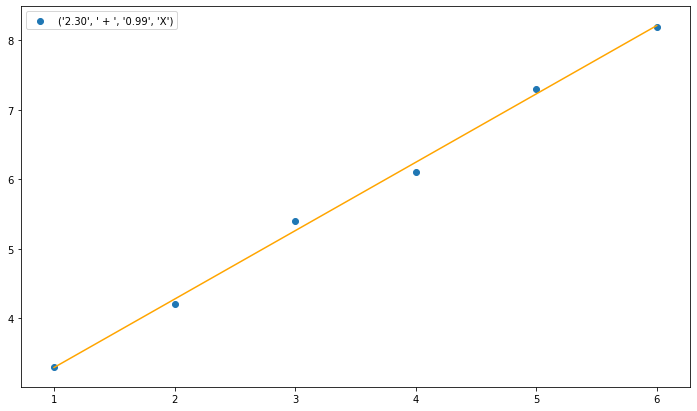

In [13]:
for i in range(1000):
    B0, B1, y_, hiba = gradient_descent_ciklushoz(B0, B1, df.X, df.y)

plt.figure(figsize=(12, 7))
plt.plot(df.X, y_, c='orange')
plt.scatter(df.X, df.y, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), 'X'))
plt.legend()
print('B0: ', B0)
print('B1: ', B1)
print('Hiba: ', hiba)